In [0]:
!pip install pyrenn
!pip install pyGRNN

In [0]:
import numpy as np

In [0]:
import pandas as pd
train_df = pd.read_csv("/content/drive/My Drive/taskgive/train_csv.csv")
test_df = pd.read_csv("/content/drive/My Drive/taskgive/test_csv.csv")

In [0]:
train_df.head()

,id,time,feature
0,0,2019-03-19 00:00:00,237.97
1,1,2019-03-19 00:00:10,57.93
2,2,2019-03-19 00:00:20,90.53
3,3,2019-03-19 00:00:30,260.75
4,4,2019-03-19 00:00:40,49.70


# observation:
There are 3 features id,time,features(lable) 

# EDA

 


1.   Spliting the time feature to split to hours,min,second,day,month,year
2.   then converting hours,min,second to seconds
3.   drop id



In [0]:
date_train=[]
t_train=[]
for index, row in train_df.iterrows():
  date,times = row['time'].split()
  date_train.append(date)
  t_train.append(times)

In [0]:
date_test=[]
t_test=[]
for index, row in test_df.iterrows():
  date,times = row['time'].split()
  date_test.append(date)
  t_test.append(times)

In [0]:
#https://stackoverflow.com/questions/6402812/how-to-convert-an-hmmss-time-string-to-seconds-in-python
def get_sec(time_str):
    """Get Seconds from time."""
    h, m, s = time_str.split(':')
    return int(h) * 3600 + int(m) * 60 + int(s)

In [0]:
sec_train=[]
for row in t_train:
  seconds=get_sec(row)
  sec_train.append(seconds)

In [0]:
sec_test=[]
for row in t_test:
  seconds=get_sec(row)
  sec_test.append(seconds)

In [0]:
year_train=[]
month_train=[]
day_train=[]
for row in date_train:
  y, m, d = row.split('-')
  year_train.append(y)
  month_train.append(m)
  day_train.append(d)



In [0]:
year_test=[]
month_test=[]
day_test=[]
for row in date_test:
  y, m, d = row.split('-')
  year_test.append(y)
  month_test.append(m)
  day_test.append(d)

In [0]:
train_df["second"]=sec_train
train_df['day']=day_train
train_df['month']=month_train
train_df['year']=year_train

test_df["second"]=sec_test
test_df['day']=day_test
test_df['month']=month_test
test_df['year']=year_test

In [0]:
train_df.std(axis = 0, skipna = True) 

id          23.237900
feature     96.846260
second     232.379001
dtype: float64

In [0]:
trainid=train_df['id']
testid=test_df['id']

In [0]:
train_df.drop(['time','id'],axis=1,inplace=True)
test_df.drop(['time','id'],axis=1,inplace=True)

In [0]:
dataftrain=train_df
dataftest=test_df

In [0]:
train_df.head()

,feature,second,day,month,year
0,237.97,0,19,03,2019
1,57.93,10,19,03,2019
2,90.53,20,19,03,2019
3,260.75,30,19,03,2019
4,49.70,40,19,03,2019


In [0]:
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
ytrain=train_df['feature']
train_df.drop(['feature'],axis=1,inplace=True)

In [0]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas.plotting import register_matplotlib_converters

In [0]:
result = adfuller(ytrain)
print('ADF Statistic: {}'.format(result[0]))
print('p-value: {}'.format(result[1]))
print('Critical Values:')
for key, value in result[4].items():
    print('\t{}: {}'.format(key, value))

ADF Statistic: -5.945866499650216
p-value: 2.205049473411699e-07
Critical Values:
	1%: -3.5159766913976376
	5%: -2.898885703483903
	10%: -2.5866935058484217


In [0]:
df = pd.read_csv("/content/drive/My Drive/taskgive/train_csv.csv")

In [0]:
df.drop(['id'],axis=1,inplace=True)

In [0]:
df.head()

,time,feature
0,2019-03-19 00:00:00,237.97
1,2019-03-19 00:00:10,57.93
2,2019-03-19 00:00:20,90.53
3,2019-03-19 00:00:30,260.75
4,2019-03-19 00:00:40,49.70


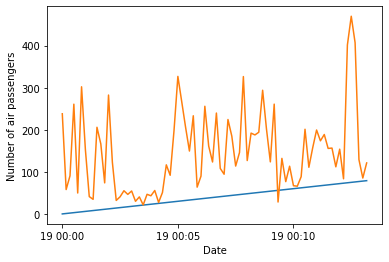

In [0]:
df = pd.read_csv('/content/drive/My Drive/taskgive/train_csv.csv', parse_dates = ['time'], index_col = ['time'])
df.head()
plt.xlabel('Date')
plt.ylabel('Number of air passengers')
plt.plot(df)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning:

divide by zero encountered in log



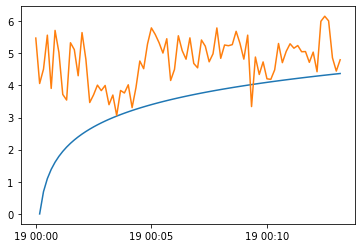

In [0]:
df_log = np.log(df)
plt.plot(df_log)

                   time  feature
id                              
0   2019-03-19 00:00:00   237.97
1   2019-03-19 00:00:10    57.93
2   2019-03-19 00:00:20    90.53
3   2019-03-19 00:00:30   260.75
4   2019-03-19 00:00:40    49.70


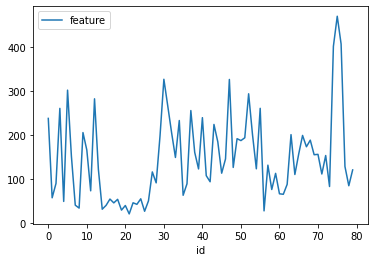

In [0]:

from pandas import read_csv
from matplotlib import pyplot
series = read_csv("/content/drive/My Drive/taskgive/train_csv.csv", header=0, index_col=0)
print(series.head())
series.plot()
pyplot.show()


In [0]:
scaler = MinMaxScaler(feature_range=(0, 1))
train_dfs = scaler.fit_transform(train_df)
test_dfs = scaler.fit_transform(test_df)

In [0]:
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from tensorflow.keras.callbacks import ModelCheckpoint
from pyGRNN import GRNN
from sklearn.metrics import mean_squared_error as MSE
from sklearn.preprocessing import MinMaxScaler
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras import Sequential
#from tensorflow.python.keras import LSTM
#from tensorflow.python.keras import Dropout


In [0]:
train_df

,second,day,month,year
0,0,19,03,2019
1,10,19,03,2019
2,20,19,03,2019
3,30,19,03,2019
4,40,19,03,2019
...,...,...,...,...
75,750,19,03,2019
76,760,19,03,2019
77,770,19,03,2019
78,780,19,03,2019


# Models Used



*   Using the models which will perform best for time series regression dataset
*   I have showing those models that atleast gave me some results migth be good or bad.This is where I came to know more how to handle time series data 





# SVR

In [0]:

Cs = [0.001, 0.01, 0.1, 1, 10,100,1000]
gammas = [0.001, 0.01, 0.1, 1]
k=['linear', 'poly', 'rbf', 'sigmoid', 'precomputed']
param_grid = {'C': Cs, 'gamma' : gammas}
grid_search = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=10)
grid_search.fit(train_df,ytrain)
grid_search.best_params_


{'C': 100, 'gamma': 0.001}

getting the best parameters

In [0]:
print(-grid_search.best_score_)

3.742307185613428


In [0]:
my_model = grid_search.best_estimator_

In [0]:
my_model.fit(train_df,ytrain)
y_pre = my_model.predict(train_df)
y_predicted = my_model.predict(test_df)

mse = np.mean((y_pre - ytrain) ** 2)
mse

4878.871625386955

In [0]:
y_predicted

array([127.409578  , 137.00251465, 140.88369787, 139.63396623,
       136.97785119, 135.09001224, 134.21727569, 133.92127249,
       133.84415405, 133.82836494, 133.82579141, 133.82545476,
       133.82541923, 133.8254162 , 133.82541598, 133.82541597,
       133.82541597, 133.82541597, 133.82541597, 133.82541597,
       133.82541597, 133.82541597, 133.82541597, 133.82541597,
       133.82541597, 133.82541597, 133.82541597, 133.82541597,
       133.82541597, 133.82541597, 133.82541597, 133.82541597,
       133.82541597, 133.82541597, 133.82541597, 133.82541597,
       133.82541597, 133.82541597, 133.82541597, 133.82541597])

In [0]:
import numpy as np
mse = np.mean((y_pre - ytrain) ** 2)
mse

4878.871625386955

In [0]:
solution = pd.DataFrame ()
solution['id']=testid
solution['feature']=y_predicted
solution.to_csv('/content/solutionsvr.csv',index=False)

In [0]:
from sklearn import tree

# DecisionTreeRegressor

In [0]:
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
depths = np.arange(1, 21)
num_leafs = [1, 5, 10, 20, 50, 100]
pipe_tree = make_pipeline(tree.DecisionTreeRegressor(random_state=1))
param_grid = [{'decisiontreeregressor__max_depth':depths,
              'decisiontreeregressor__min_samples_leaf':num_leafs}]

gs = GridSearchCV(estimator=pipe_tree, param_grid=param_grid, scoring='neg_root_mean_squared_error', cv=10)              

In [0]:
gs = gs.fit(train_df,ytrain)

In [0]:
print(-gs.best_score_)

85.61597184969106


In [0]:
print(gs.best_params_)

{'decisiontreeregressor__max_depth': 3, 'decisiontreeregressor__min_samples_leaf': 5}


In [0]:
my_model = gs.best_estimator_

In [0]:
my_model.fit(train_df,ytrain)
y_pre = my_model.predict(train_df)
y_predicted = my_model.predict(test_df)
import numpy as np
mse = np.mean((y_pre - ytrain) ** 2)
mse

5627.213254203704

In [0]:
solution = pd.DataFrame ()
solution['id']=testid
solution['feature']=y_predicted
solution.to_csv('/content/solution.csv',index=False)

# KNN

In [0]:

k_range = list(range(1,31))
weight_options = ["uniform", "distance"]
algorithms =['auto', 'ball_tree', 'kd_tree', 'brute']

param_grid = [{'n_neighbors':k_range, 'weights':weight_options,'algorithm':algorithms}]
print (param_grid)
knn = KNeighborsRegressor()

grid = GridSearchCV(knn, param_grid, cv = 10, scoring = 'neg_root_mean_squared_error')
grid.fit(train_df,ytrain)

[{'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance'], 'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}]


GridSearchCV(cv=10, error_score=nan,
             estimator=KNeighborsRegressor(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           n_neighbors=5, p=2,
                                           weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid=[{'algorithm': ['auto', 'ball_tree', 'kd_tree',
                                        'brute'],
                          'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                          13, 14, 15, 16, 17, 18, 19, 20, 21,
                                          22, 23, 24, 25, 26, 27, 28, 29, 30],
                          'weights': ['uniform', 'distance']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_root_mean_squared_error', verbose=0)

In [0]:
print(-grid.best_score_)

88.29320891067673


In [0]:
print(grid.best_params_)

{'algorithm': 'auto', 'n_neighbors': 3, 'weights': 'uniform'}


In [0]:
my_model = grid.best_estimator_

In [0]:
my_model.fit(train_df,ytrain)
y_pre = my_model.predict(train_df)
y_predicted = my_model.predict(test_df)
import numpy as np
mse = np.mean((y_pre - ytrain) ** 2)
mse

3525.3114823611113

In [0]:
solution = pd.DataFrame ()
solution['id']=test_df['id']
solution['feature']=y_predicted
solution.to_csv('/content/solution.csv',index=False)

# MLP Model

I know that deep learning models will not perform well but just want to try it out

Using TensorFlow backend.


In [0]:
from keras import backend as K
def root_mean_squared_error(y_true, y_pred):
        return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

In [0]:
train_dfs[1].shape

(4,)

In [0]:
#from keras.callbacks import ModelCheckpoint,TensorBoard,ReduceLROnPlateau, EarlyStopping

from tensorflow.keras.callbacks import ModelCheckpoint
checkpointer = ModelCheckpoint("/content/drive/My Drive/seach/model1/modelll.hdf5", monitor = "loss", save_best_only = True, mode="min",verbose=1)
callbacks_1 = [checkpointer]

In [0]:
model = Sequential()
model.add(Dense(100, activation='relu'))
model.add(Dense(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss=root_mean_squared_error)
# fit model
model.fit(train_dfs,ytrain, epochs=200, verbose=1,callbacks = callbacks_1)

Epoch 1/200
1/3 [=========>....................] - ETA: 0s - loss: 117.8559
Epoch 00001: loss improved from inf to 148.74516, saving model to /content/drive/My Drive/seach/model1/modelll.hdf5
3/3 [==============================] - 1s 471ms/step - loss: 148.7452
Epoch 2/200
1/3 [=========>....................] - ETA: 0s - loss: 146.8163
Epoch 00002: loss improved from 148.74516 to 146.29686, saving model to /content/drive/My Drive/seach/model1/modelll.hdf5
3/3 [==============================] - 0s 13ms/step - loss: 146.2969
Epoch 3/200
1/3 [=========>....................] - ETA: 0s - loss: 155.6090
Epoch 00003: loss did not improve from 146.29686
3/3 [==============================] - 0s 2ms/step - loss: 147.3642
Epoch 4/200
1/3 [=========>....................] - ETA: 0s - loss: 163.4967
Epoch 00004: loss did not improve from 146.29686
3/3 [==============================] - 0s 2ms/step - loss: 148.5052
Epoch 5/200
1/3 [=========>....................] - ETA: 0s - loss: 144.1284
Epoch 000

In [0]:
y_pre = model.predict(train_dfs)


In [0]:
p=[el[0] for el in y_pre]

In [0]:
p

In [0]:
y_pre.tolist()

In [0]:
y_predicted = model.predict(test_dfs)

In [0]:
y_predicted.tolist()

In [0]:
y_pre

In [0]:
#p=[el[0] for el in y_pre]
import numpy as np
mse = np.mean((p - ytrain) ** 2)
mse

9431.538551933063

In [0]:
y_predicted
p=[el[0] for el in y_predicted]
p

In [0]:
test_df

In [0]:
solution = pd.DataFrame ()
solution['id']=test_df['id']
solution['feature']=y_predicted
solution.to_csv('/content/solution.csv',index=False)

# GRNN

In [0]:

IGRNN = GRNN()

In [0]:
params_IGRNN = {'kernel':["RBF"],
                'sigma' : list(np.arange(0.1, 4, 0.01)),
                'calibration' : ['None']
                 }
grid_IGRNN = GridSearchCV(estimator=IGRNN,
                          param_grid=params_IGRNN,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1
                          )
grid_IGRNN.fit(train_dfs,ytrain.ravel())
best_model = grid_IGRNN.best_estimator_
y_pred = best_model.predict(train_dfs)
mse_IGRNN = MSE(ytrain, y_pred)

mse_IGRNN

Fitting 5 folds for each of 390 candidates, totalling 1950 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1950 out of 1950 | elapsed:    2.2s finished


8728.23266106777

In [0]:
AGRNN = GRNN(calibration="gradient_search")
AGRNN.fit(train_dfs,ytrain.ravel())
sigma=AGRNN.sigma 
y_pred = AGRNN.predict(train_dfs)
mse_AGRNN = MSE(ytrain, y_pred)
mse_AGRNN

8726.514737275726

# LGBMRegressor

In [0]:
from lightgbm import LGBMRegressor
params = {'n_estimators':[20,50,100,500,1000,1500],
         'learning_rate':[0.0005,0.005,.01,.1]}

model_lgbm2 = LGBMRegressor(random_state=0)
tune_lgbm =GridSearchCV(estimator=model_lgbm2, cv = 10,param_grid=params,scoring='neg_root_mean_squared_error')

In [0]:
tune_lgbm = tune_lgbm.fit(train_dfs,ytrain)

In [0]:
print(-tune_lgbm.best_score_)

90.60652929791357


In [0]:
print(tune_lgbm.best_params_)

{'learning_rate': 0.01, 'n_estimators': 50}


In [0]:
my_model = tune_lgbm.best_estimator_

In [0]:
my_model.fit(train_dfs,ytrain)
y_pre = my_model.predict(train_dfs)
y_predicted = my_model.predict(test_dfs)
import numpy as np
mse = np.mean((y_pre - ytrain) ** 2)
mse

8390.233461186663

In [0]:
solution = pd.DataFrame ()
solution['id']=test_df['id']
solution['feature']=y_predicted
solution.to_csv('/content/solution.csv',index=False)

# Linear Regression

In [0]:
train_dfs,ytrain
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(train_dfs,ytrain)

lr_y_fit = lr_model.predict(train_dfs)
lr_y_pred = lr_model.predict(test_dfs)


lr_residuals = lr_y_fit - ytrain
lr_rmse = np.sqrt(np.sum(np.power(lr_residuals,2)) / len(lr_residuals))
print('RMSE = %.2f' % lr_rmse)

RMSE = 92.66


In [0]:
solution = pd.DataFrame ()
solution['id']=test_df['id']
solution['feature']=lr_y_pred
solution.to_csv('/content/solutionlr.csv',index=False)

# SARIMAX


I tried to use it but I failed to get the results 

In [0]:
test_df.head()

,second
0,800
1,810
2,820
3,830
4,840


In [0]:
train_df.head()

,feature,day,month,year
second,,,,
0,237.97,19,03,2019
10,57.93,19,03,2019
20,90.53,19,03,2019
30,260.75,19,03,2019
40,49.70,19,03,2019


In [0]:
train_df.drop(['day','month','year'],axis=1)

In [0]:
test_df.drop(['day','month','year'],axis=1)

In [0]:
test_df.head()

,second,day,month,year
0,800,19,03,2019
1,810,19,03,2019
2,820,19,03,2019
3,830,19,03,2019
4,840,19,03,2019


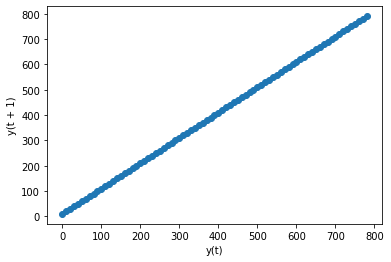

In [0]:
pd.plotting.lag_plot(train_df['second'])
plt.show()

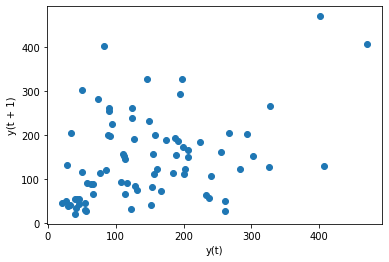

In [0]:
pd.plotting.lag_plot(train_df['feature'])
plt.show()

In [0]:
train_df = train_df.set_index('second')
test_df = test_df.set_index('second')

In [0]:
import statsmodels.api as sm

In [0]:
mod = sm.tsa.SARIMAX(df['feature'], trend='n', order=(20,2,9), seasonal_order=(1,1,1,12))
results = mod.fit()
print(results.summary())

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/base/tsa_model.py:165: ValueWarning:

No frequency information was provided, so inferred frequency 10S will be used.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:949: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/tsa/statespace/sarimax.py:961: UserWarning:

Non-invertible starting MA parameters found. Using zeros as starting parameters.

/usr/local/lib/python3.6/dist-packages/statsmodels/base/model.py:512: ConvergenceWarning:

Maximum Likelihood optimization failed to converge. Check mle_retvals



                                  Statespace Model Results                                 
Dep. Variable:                             feature   No. Observations:                   80
Model:             SARIMAX(20, 2, 9)x(1, 1, 1, 12)   Log Likelihood                -396.630
Date:                             Tue, 14 Apr 2020   AIC                            857.260
Time:                                     16:13:31   BIC                            927.329
Sample:                                 03-19-2019   HQIC                           884.948
                                      - 03-19-2019                                         
Covariance Type:                               opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0758    330.146     -0.003      0.997    -648.151     645.999
ar.L2         -0.9045    10

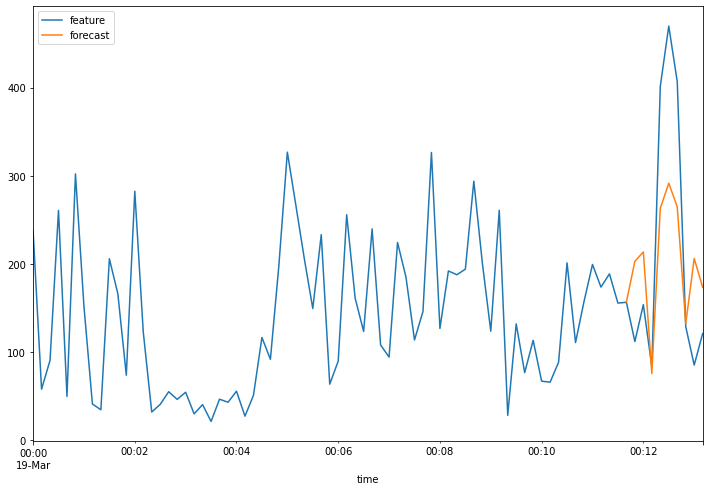

In [0]:
df['forecast'] = results.predict(start = 70, end= 80, dynamic= True)  
df[['feature', 'forecast']].plot(figsize=(12, 8))
plt.show()

In [0]:
test_df = pd.read_csv("/content/drive/My Drive/taskgive/test_csv.csv")

In [0]:
test_df.head()

,id,time
0,80,2019-03-19 00:13:20
1,81,2019-03-19 00:13:30
2,82,2019-03-19 00:13:40
3,83,2019-03-19 00:13:50
4,84,2019-03-19 00:14:00


In [0]:
def forcasting_future_months(df, no_of_months):
    df_perdict = df.reset_index()

    mon = df_perdict['time']
    mon = mon + pd.DateOffset(seconds = no_of_months)
    future_dates = mon[no_of_months -1:]
    df_perdict.set_index(pd.DatetimeIndex(pd.to_datetime(df_perdict.time)), inplace=True)
    #df_perdict = df_perdict.set_index('time')
    future = pd.DataFrame(index=future_dates, columns= df_perdict.columns)
    df_perdict = pd.concat([df_perdict, future])
    df_perdict['forecast'] = results.predict(start = 0, end = 100, dynamic= True)  
    df_perdict[['time', 'forecast']].iloc[-no_of_months - 10:].plot(figsize=(12, 8))
    plt.show()
    return df_perdict[-no_of_months:]


In [0]:
test_df['time']=pd.to_datetime(pd.Series(test_df.time), format="%Y/%m/%d %H:%M:%S")

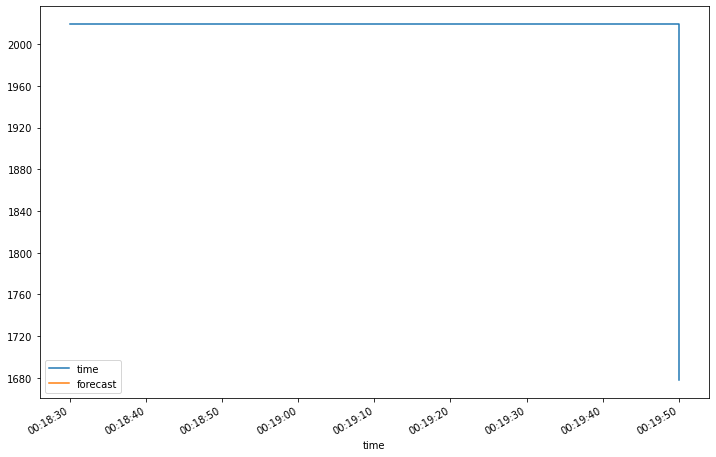

In [0]:
predicted = forcasting_future_months(test_df,0)

In [0]:
test_df.head

<bound method NDFrame.head of      id                time
0    80 2019-03-19 00:13:20
1    81 2019-03-19 00:13:30
2    82 2019-03-19 00:13:40
3    83 2019-03-19 00:13:50
4    84 2019-03-19 00:14:00
5    85 2019-03-19 00:14:10
6    86 2019-03-19 00:14:20
7    87 2019-03-19 00:14:30
8    88 2019-03-19 00:14:40
9    89 2019-03-19 00:14:50
10   90 2019-03-19 00:15:00
11   91 2019-03-19 00:15:10
12   92 2019-03-19 00:15:20
13   93 2019-03-19 00:15:30
14   94 2019-03-19 00:15:40
15   95 2019-03-19 00:15:50
16   96 2019-03-19 00:16:00
17   97 2019-03-19 00:16:10
18   98 2019-03-19 00:16:20
19   99 2019-03-19 00:16:30
20  100 2019-03-19 00:16:40
21  101 2019-03-19 00:16:50
22  102 2019-03-19 00:17:00
23  103 2019-03-19 00:17:10
24  104 2019-03-19 00:17:20
25  105 2019-03-19 00:17:30
26  106 2019-03-19 00:17:40
27  107 2019-03-19 00:17:50
28  108 2019-03-19 00:18:00
29  109 2019-03-19 00:18:10
30  110 2019-03-19 00:18:20
31  111 2019-03-19 00:18:30
32  112 2019-03-19 00:18:40
33  113 2019-03-19

In [0]:
predicted

,index,id,time,forecast
time,,,,
2019-03-19 00:13:20,0,80,2019-03-19 00:13:20,0.0
2019-03-19 00:13:30,1,81,2019-03-19 00:13:30,0.0
2019-03-19 00:13:40,2,82,2019-03-19 00:13:40,0.0
2019-03-19 00:13:50,3,83,2019-03-19 00:13:50,0.0
2019-03-19 00:14:00,4,84,2019-03-19 00:14:00,0.0
2019-03-19 00:14:10,5,85,2019-03-19 00:14:10,0.0
2019-03-19 00:14:20,6,86,2019-03-19 00:14:20,0.0
2019-03-19 00:14:30,7,87,2019-03-19 00:14:30,0.0
2019-03-19 00:14:40,8,88,2019-03-19 00:14:40,0.0


# Observation:
SVM perform the best then all the other model